# Course End Project - Sales Analysis
## Project Statement
AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. 
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
1. Determine the states that are generating the highest revenues, and
2. Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same

Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year. Enclosed is the CSV (AusApparalSales4thQrt2020.csv)  file that covers the said data.
### Perform the following Steps
As a data scientist, you must perform the following main steps on the enclosed data.
1.	Data Wrangling
2.	Data Analysis
3.	Data Visualization and
4.	Report Generation

### Data Wrangling
* Ensure that the data is clean and that there is no missing or incorrect data. 
    - Inspect the data manually for missing/incorrect data using the functions isna(), and notna().
* Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).
* Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)
* Share your recommendation on the usage of the groupby() function for data chunking or merging.
### Data Analysis
* Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.). 
* Determine which group is generating the highest sales, and which group is generating the lowest sales.
* Determine which state is generating the highest sales, and which state is generating the lowest sales.
* Generate weekly, monthly and quarterly reports for the analysis made.
(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)
### Data Visualization
* Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like 
    - State-wise sales analysis for different groups (kids, women, men, and seniors) 
    - Group-wise sales analysis (kids, women, men, and seniors) across different states.
    - Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].

* The dashboard must contain daily, weekly, monthly and quarterly charts.
(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
* Include your recommendation, and indicate why you are choosing the recommended visualization package.
### Report Generation 
* Use JupyterLab Notebook for report generation (wrangling, analysis and visualization) Please note that JupyterLab allows you to mix code with graphs and plots etc.
* Use Markdown in suitable places, while presenting your report. 
* The report should contain suitable graphs, plots and analysis reports, and recommendations. Please note that different aspects of analysis demand different graphs/plots. 
    - Use box plot for descriptive statistics
    - Use Seaborn distribution plot or any other statistical plotting.

## Time Allocated: 1 Hour



# Analysis and Report on Sales of AAL

As a part of this, the very first step is that we are going to import the necessary libraries, and they are as follows:

```
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
```

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In the next, we are going to read the .csv file and store that as a dataframe called ```df```.

In [47]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})

Now, print the dataframe ```df``` and ascertain the number of rows and colums of data.

In [48]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


As you can see from the above, there are 7560 rows and 6 columns. On the left extreme column, you can see the index, **Date** column, beginning with *1-Oct-2020* and ending with 30-Dec-2020. **Time** column is the categorical data showing *Morning*, *Afternoon* and *Evening*. Likewise, **State** is the categorical data indicating the different states of Australia, **Group** is another Categorical Data with *Kids*, *Men*, *Women* and *Seniors*. Only **Unit** and **Sales** contain the numerical data.

This report will be almost exclusively deals with the Sales and related data, and other data, if required, will be brought forward. 

Also, you can note that the data seems to be congrous, and missing or NA is not yet know. We are going to test for that now:

In [49]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In the above step, we invoked ```isna()``` method on the dataframe object, and ```sum()``` method on the top of it. This shows number of NA, or missing values for each column of the dataframe. As you can see, for each column, the missing or NA values is 0. This gives us confidence of going ahead with the analysis, as the data seems to be clean.

In [50]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

## Data Normalization
For performing the data normalization, first of all, we need to separate the numerical and non numerica data. We will create a new dataframe called df_dataonly from the existing df object, as follows:

In [51]:
df_dataonly = df[['Unit', 'Sales']]



```
# This is formatted as code
```

Now, from the MinMaxScalar object, create a normalize object, as shown below:

In [52]:
normalize = MinMaxScaler()

Next, invoke the ```fit_transform()``` method, and pass this newly created object called ```df_dataonly```. Let's name the resulting object as ```normalize_data```.

In [53]:
normalize_data = normalize.fit_transform(df_dataonly)

As you can see, normalize_data object is a ndarray of 2 columns and 7560 rows. The first columns in the Unit, and the second column is the Sales data. The normalization will render normalize the data for each column between 0 and 1. You can test it as follows:

```normalize_data[:, [0]]``` will list all the values of normailzed **Unit** values, while ```normalize_data[:, [1]]``` will list all the values of normalized **Sales** values.

In [54]:
normalize_data[:, [0]]

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

In [55]:
normalize_data[:, [1]]

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

Now, check the min and max values of each of the column. Min should be 0.0 and max should be 1.0, for **Unit** as well as **Sales** column. Let's print them as follows:

In [56]:
print(normalize_data[:, [0]].min(), normalize_data[:, [0]].max())

0.0 0.9999999999999999


In [57]:
print(normalize_data[:, [1]].min(), normalize_data[:, [1]].max())

0.0 1.0


## Top Level Picture
Let's plot the Date versus Unit and Date versus Sales line plot for the entire season. Note the values of **Unit** and **Sales** are summed up for each day.

In [58]:
dates = df['Date']
# df.groupby(by='Date').count()
df_unit_and_sales = df.groupby(by='Date', axis='index').sum()

In [59]:
df_unit_and_sales

,Unit,Sales
Date,,
2020-10-01,1488,3720000
2020-10-02,1486,3715000
2020-10-03,1556,3890000
2020-10-04,1488,3720000
2020-10-05,1545,3862500
...,...,...
2020-12-26,1886,4715000
2020-12-27,1855,4637500
2020-12-28,1838,4595000



## Monthly Data Analysis
Now, let's chunk this quarterly data into monthly data and perform the analysis. For each of the month, let's get the sub-dataframe, using the ```loc``` feature of dataframe, and pass the range by date. For example, for the month of October, the range for ```loc``` will be ```'2020-10-01':'2020-10-30'```, and we will be capruting it as ```df_dec```. Similarly, for the month of November and December, we have sub-dataframe objects ```df_nov``` and ```df.dec```. These are shown in the next 3 steps.

In [60]:
df_oct = df_unit_and_sales.loc['2020-10-01':'2020-10-30']

In [61]:
df_nov = df_unit_and_sales.loc['2020-11-01':'2020-11-30']

In [62]:
df_dec = df_unit_and_sales.loc['2020-12-01':'2020-12-31']

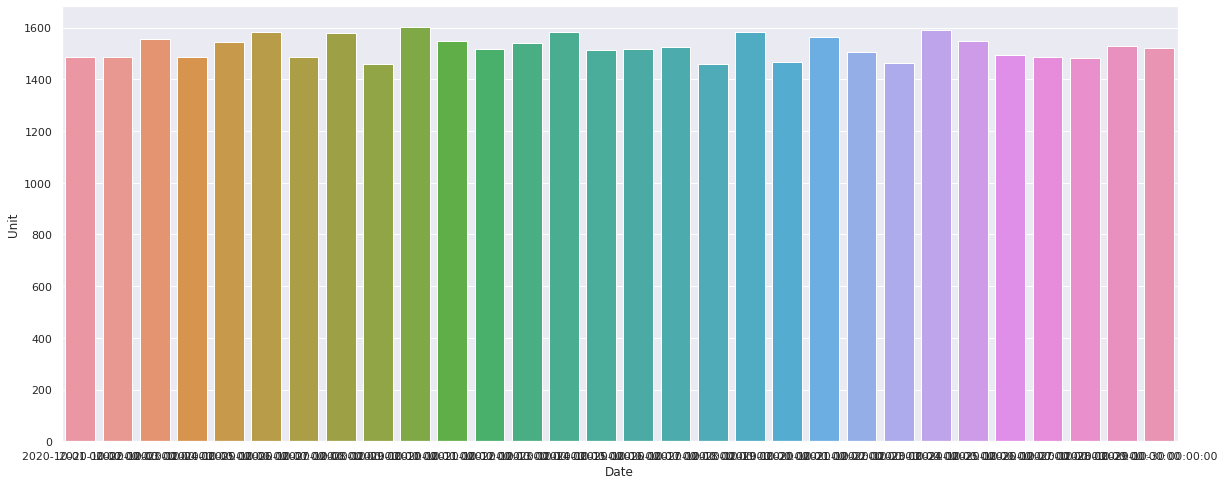

In [63]:
# df_oct.plot.bar(y='Unit')
df_oct.index
sns.barplot(x = df_oct.index, y = 'Unit', data=df_oct)

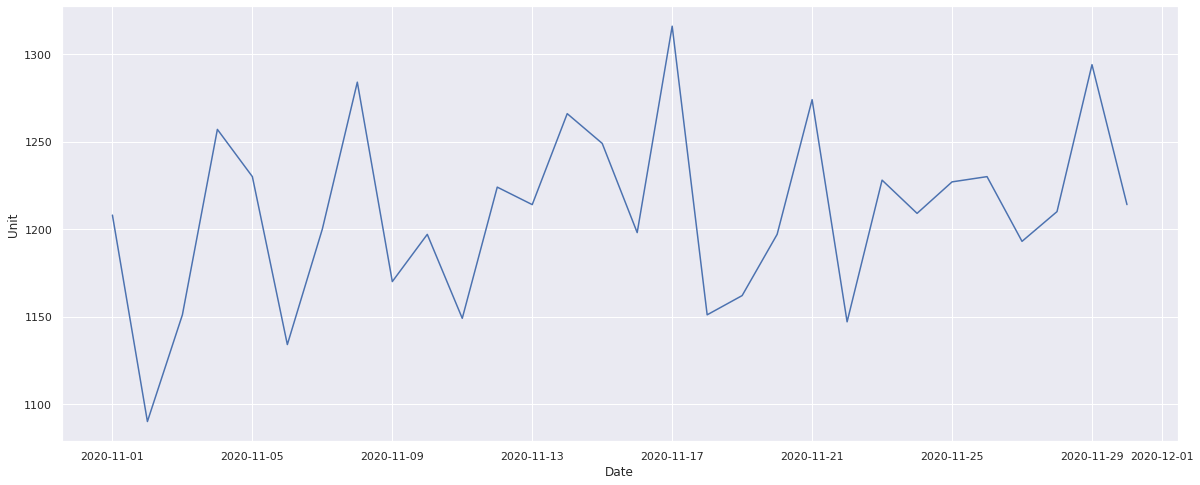

In [64]:
sns.lineplot(x = df_nov.index, y='Unit', data=df_nov)

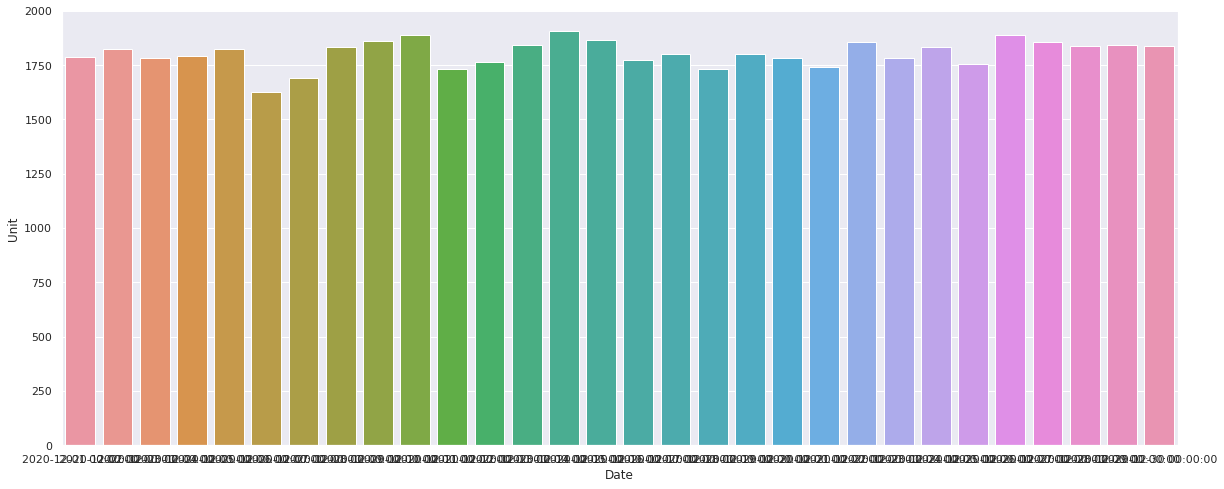

In [65]:
sns.barplot(x = df_dec.index, y = 'Unit', data=df_dec)

## Describing Data
### Data Description
Describing the data will give you the very first level information on the data with the basic information on the data such as ```count```, ```mean```, ```std``` (standard deviation), ```min```, ```max``` and the quartiles. You will use the ```describe()``` command on the dataframe to get it. All the values are for the entire three month period.

In [66]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


For individual three months, we can invole ```describe()``` on ```df_oct```, ```df_nov``` and ```df_dec```, as shown:

In [67]:
df_oct.describe()

,Unit,Sales
count,30.000000,3.000000e+01
mean,1523.866667,3.809667e+06
std,43.041867,1.076047e+05
min,1458.000000,3.645000e+06
25%,1487.250000,3.718125e+06
50%,1519.500000,3.798750e+06
75%,1554.500000,3.886250e+06
max,1602.000000,4.005000e+06


In [68]:
df_nov.describe()

,Unit,Sales
count,30.000000,3.000000e+01
mean,1209.100000,3.022750e+06
std,51.177413,1.279435e+05
min,1090.000000,2.725000e+06
25%,1175.750000,2.939375e+06
50%,1209.500000,3.023750e+06
75%,1230.000000,3.075000e+06
max,1316.000000,3.290000e+06


In [69]:
df_dec.describe()

,Unit,Sales
count,30.000000,3.000000e+01
mean,1804.400000,4.511000e+06
std,61.370329,1.534258e+05
min,1624.000000,4.060000e+06
25%,1775.750000,4.439375e+06
50%,1812.500000,4.531250e+06
75%,1842.750000,4.606875e+06
max,1906.000000,4.765000e+06


### Box Plot Analysis
#### Unit Analysis

[Text(0.5, 1.0, 'December Units')]

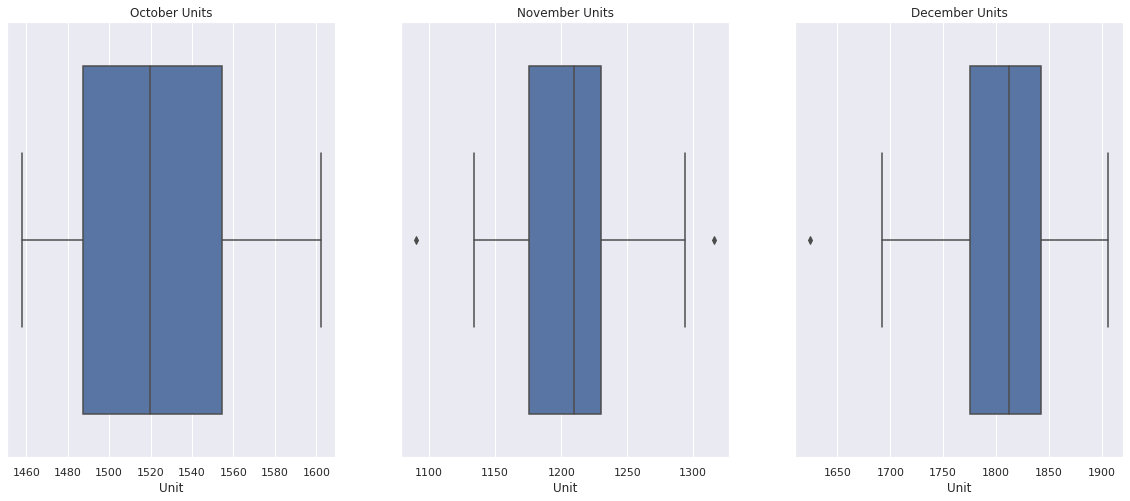

In [70]:
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1, 3)
bp_oct = sns.boxplot(x='Unit', data=df_oct, ax=axes[0])
bp_nov = sns.boxplot(x='Unit', data=df_nov, ax=axes[1])
bp_dec = sns.boxplot(x='Unit', data=df_dec, ax=axes[2])
bp_oct.set(title='October Units')
bp_nov.set(title='November Units')
bp_dec.set(title='December Units')

In the above boxplots, you can see the variation in the quartiles for three different months. For the month of October, it is rather wide-spread with a mean value of 1523, where as, for the month of November and December, they are rather narrow. For November, the mean value is 1209, and for the month of December, it is 1804. 

#### Sales Analysis

[Text(0.5, 1.0, 'December Sales')]

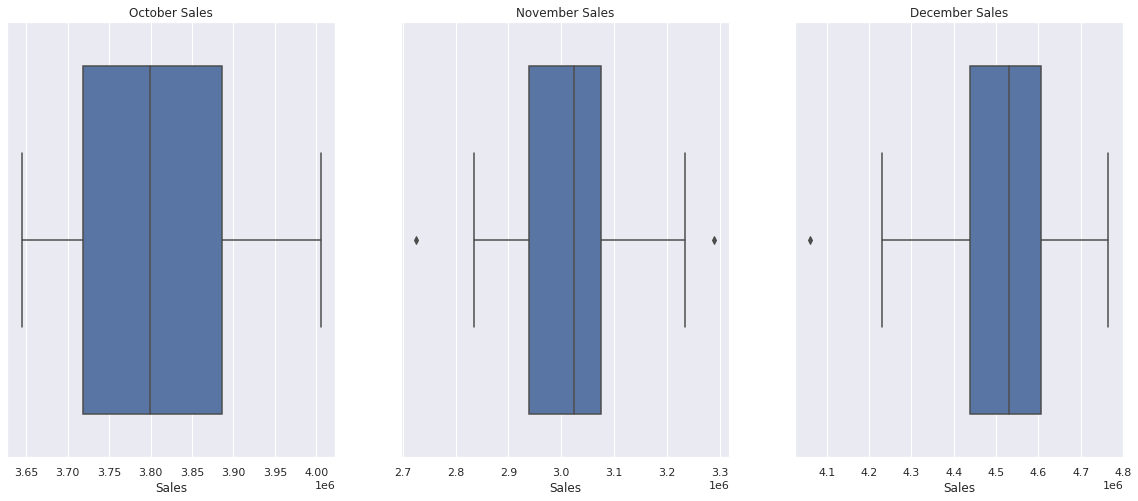

In [71]:
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1, 3)
bp_oct = sns.boxplot(x='Sales', data=df_oct, ax=axes[0])
bp_nov = sns.boxplot(x='Sales', data=df_nov, ax=axes[1])
bp_dec = sns.boxplot(x='Sales', data=df_dec, ax=axes[2])
bp_oct.set(title='October Sales')
bp_nov.set(title='November Sales')
bp_dec.set(title='December Sales')

In the above boxplots, you can see the variation in the quartiles for three different months for **Sales** values. For the month of October, it is rather wide-spread with a mean value of 3.809667e+06, where as, for the month of November and December, they are rather narrow. For November, the mean value is 3.022750e+06, and for the month of December, it is 4.511000e+06, the highest ever. Note these values are consolidated across **State**, **Group** and **Time** categorical valirbles.

## Monthly Plots and Analysis
In the above section, we separated the data monthly wise and performed the top-level description to get the main statistics of the sales. In this section, we will plot, month-wise and do a comparative study on the numbers.

### Overall Unit and Sales figures

In [72]:
oct_days = df_oct.index.day
oct_days.astype('str')
nov_days = df_nov.index.day
nov_days.astype('str')
dec_days = df_dec.index.day
dec_days.astype('str')

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'],
      dtype='object', name='Date')

#### Units sold in October, November and December
For this, we can use bar plot of seaborn, and sub-plots feature of Matplotlib. All the three months are plotted on the same level. As you can see, the plot shows a mean value of 1523 units for the month of October, 1209 for the month of November and 1804 for the month of December. As you can see these numbers are endorsed by the ```describe()``` command previously. Accordingly, November month was leaner in Unit sales, than October and December of 2020.

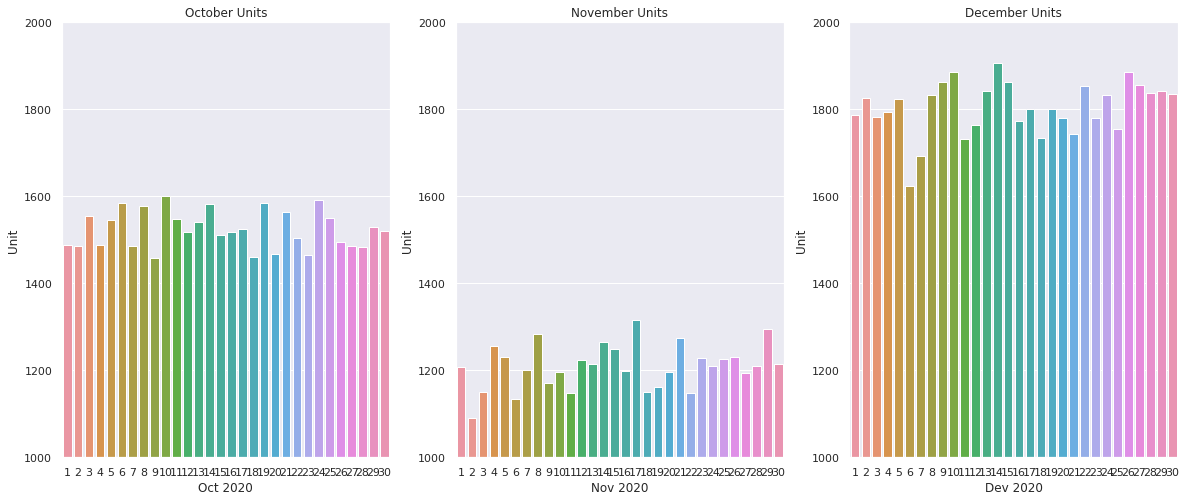

In [73]:
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1, 3)
bp_oct = sns.barplot(x = df_oct.index, y='Unit', data=df_oct, ax=axes[0])
bp_nov = sns.barplot(x = df_nov.index, y='Unit', data=df_nov, ax=axes[1])
bp_dec = sns.barplot(x = df_dec.index, y='Unit', data=df_dec, ax=axes[2])
bp_oct.set(xlabel='Oct 2020', title='October Units')
bp_nov.set(xlabel='Nov 2020', title='November Units')
bp_dec.set(xlabel='Dev 2020', title='December Units')
bp_oct.set(ylim=(1000, 2000))
bp_nov.set(ylim=(1000, 2000))
bp_dec.set(ylim=(1000, 2000))
o = bp_oct.set_xticklabels(oct_days)
n = bp_nov.set_xticklabels(nov_days)
d = bp_dec.set_xticklabels(dec_days)

### Sales numbers for October, November and December
We are using lineplot for seaborn, and once again, we use sub-plot features of Matplotlib, and the sales figures are plotted for each month and plotted one-next-to-the other. Also, you can see, the y axis is same for all the plots, and based on the available numbers, December was most productive in terms of the monthly sales.

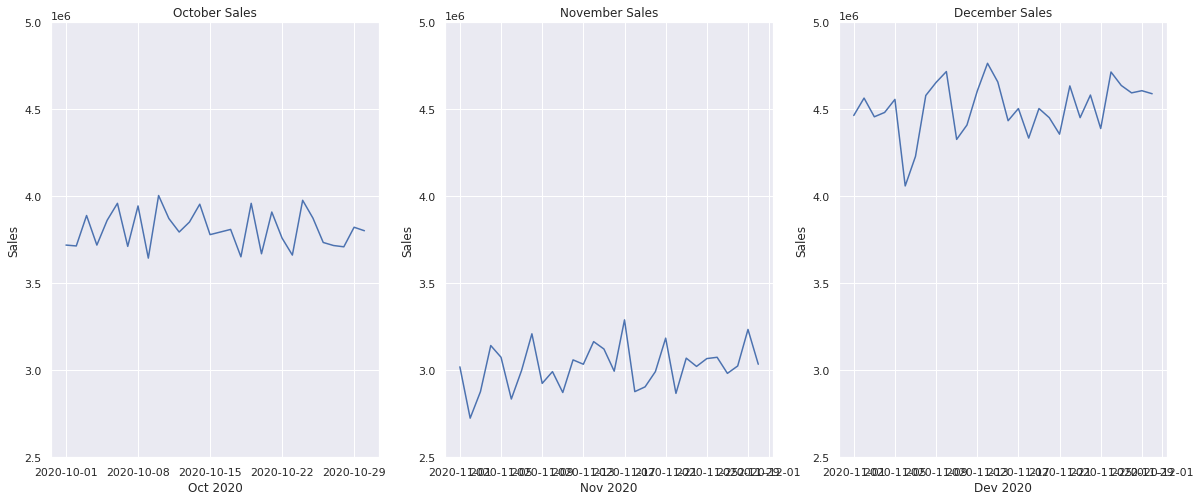

In [74]:
import matplotlib
# sns.lineplot(x = 'Date', y = 'Unit', data = df)
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1, 3)
lp_oct = sns.lineplot(x = df_oct.index, y = 'Sales', data=df_oct, ax=axes[0])
lp_nov = sns.lineplot(x = df_nov.index, y = 'Sales', data=df_nov, ax = axes[1])
lp_dec = sns.lineplot(x = df_nov.index, y = 'Sales', data=df_dec, ax = axes[2])
lp_oct.set(ylim=(2.5e6, 5.0e6))
lp_nov.set(ylim=(2.5e6, 5.0e6))
lp_dec.set(ylim=(2.5e6, 5.0e6))
lp_oct.set(xlabel='Oct 2020', title='October Sales')
lp_nov.set(xlabel='Nov 2020', title='November Sales')
lp_dec.set(xlabel='Dev 2020', title='December Sales')

loc = matplotlib.dates.DayLocator(bymonthday=range(1, 30, 7))

lp_oct.xaxis.set_major_locator(loc)

### Consolidated 3 month Sales plot
The following is the typical Sales figures, using the lineplot of seaborn. Notice that we are using the original dataframe object df, and this has all the three months of data, as against the previous three, where the three sub-dataframes are separated by ```groupby()``` feature of pandas. One more point to be noted here. This plot is different from the plot above, and this is evident from the values of y-axis. The difference here is that the above figures are consolidated data for each month, including the **Group** and **Time** data, which are categorical in nature.

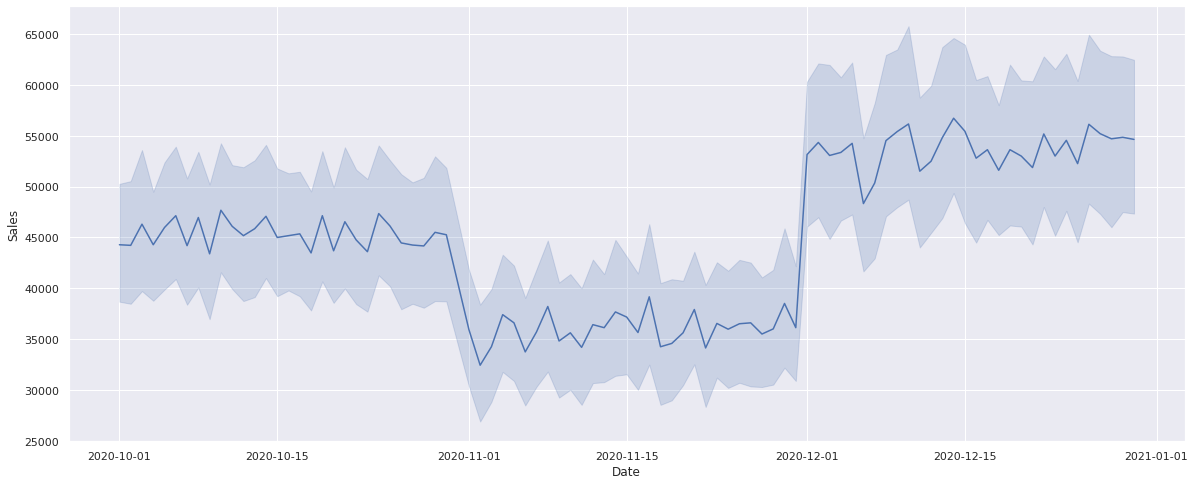

In [75]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x = 'Date', y = 'Sales', data = df)

One more aspect of this is that this line plot is inclusive of stastical estimation and errors bars that are superimposed on the line plot. This is the special feature of seaborn. This is provided eventhough it is not asked for.

## Comprehensive Snapshot
The following are the complete month-wise snapshots that shows monthly Units sales on the top-row, and monthly Sales in the bottom. The sub-plot feature is used to get a complets comprehensive shanshot for the three months.

[(2500000.0, 5000000.0)]

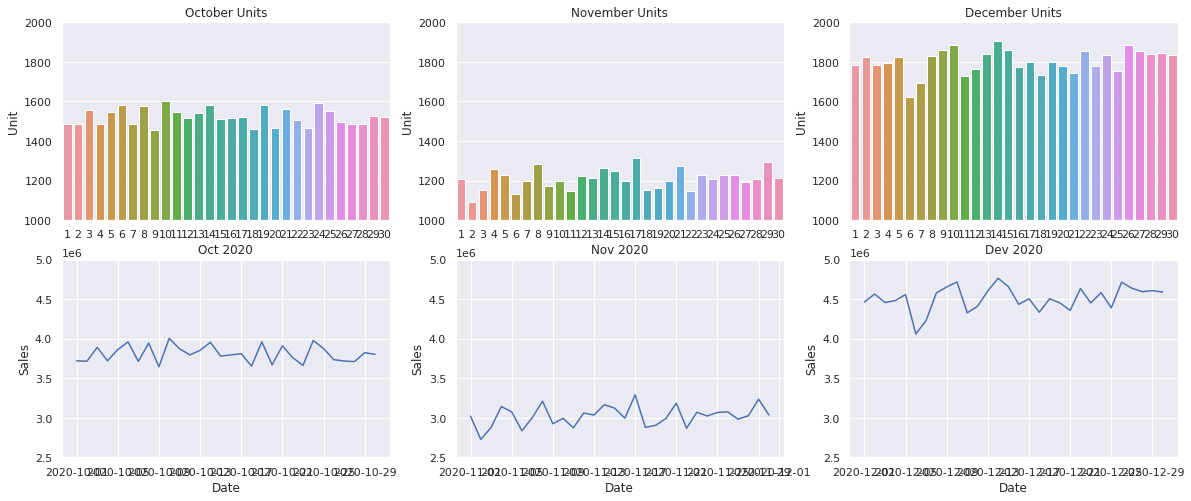

In [76]:
fig, axes = plt.subplots(2, 3)

bp_oct = sns.barplot(x = df_oct.index, y='Unit', data=df_oct, ax=axes[0,0])
bp_nov = sns.barplot(x = df_nov.index, y='Unit', data=df_nov, ax=axes[0,1])
bp_dec = sns.barplot(x = df_dec.index, y='Unit', data=df_dec, ax=axes[0,2])

bp_oct.set(xlabel='Oct 2020', title='October Units')
bp_nov.set(xlabel='Nov 2020', title='November Units')
bp_dec.set(xlabel='Dev 2020', title='December Units')

bp_oct.set(ylim=(1000, 2000))
bp_nov.set(ylim=(1000, 2000))
bp_dec.set(ylim=(1000, 2000))

o = bp_oct.set_xticklabels(oct_days)
n = bp_nov.set_xticklabels(nov_days)
d = bp_dec.set_xticklabels(dec_days)

lp_oct = sns.lineplot(x = df_oct.index, y='Sales', data=df_oct, ax=axes[1,0])
lp_nov = sns.lineplot(x = df_nov.index, y='Sales', data=df_nov, ax=axes[1,1])
lp_dec = sns.lineplot(x = df_dec.index, y='Sales', data=df_dec, ax=axes[1,2])

lp_oct.set(ylim=(2.5e6, 5.0e6))
lp_nov.set(ylim=(2.5e6, 5.0e6))
lp_dec.set(ylim=(2.5e6, 5.0e6))

## Analysis of Statewise sales in Australia
In the next, we are going to perform the analysis based on the categorical data of the problem. There are three main categories - **State**, **Group** and **Time**. In the first, we are going to pivot our main dataframe ```df``` indexed on **State**, and also we are providing 2 ```aggfunc```tions for computing - ```sum``` and ```mean```. The reporting will be state-wise, and we are calling it as ```state_pivot```. As you can see from the output, both ```sum``` and ```mean``` for **Unit** and **Sales** are reported.

In [77]:
state_pivot = pd.pivot_table(df, index='State', aggfunc=['sum', 'mean'])
state_pivot 

sum                 mean           
           Sales   Unit         Sales       Unit
State                                           
 NSW    74970000  29988  69416.666667  27.766667
 NT     22580000   9032  20907.407407   8.362963
 QLD    33417500  13367  30942.129630  12.376852
 SA     58857500  23543  54497.685185  21.799074
 TAS    22760000   9104  21074.074074   8.429630
 VIC   105565000  42226  97745.370370  39.098148
 WA     22152500   8861  20511.574074   8.204630

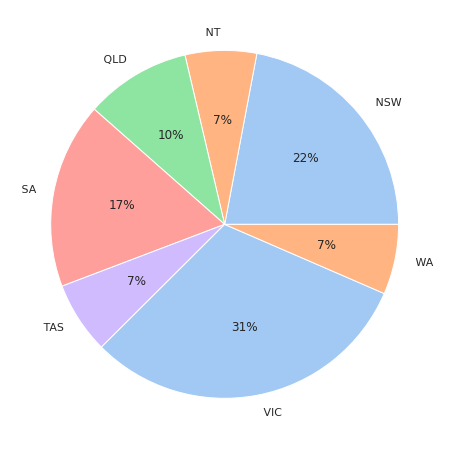

In [78]:
labels = state_pivot['mean']['Sales'].index.to_list()
# print(labels)
colors = sns.color_palette('pastel')[0:5]
plt.pie(state_pivot['mean']['Sales'], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

From the above pie chart, we can infer that more than 70% of the business come from the three states VIC, NSW and SA. Remaining states contribute just about 30%. This is based on the mean **Sales** data.

## Groupwise Analysis
In the next, we are going to perform the analysis based on the next categorical data of the problem - **Group**.  Here, we are going to pivot our main dataframe ```df``` indexed on **Group**, and also we are providing the same two ```aggfunc```tions for computing - ```sum``` and ```mean```. The reporting will be state-wise, and we are calling it as ```group_pivot```. As you can see from the output, both ```sum``` and ```mean``` for **Unit** and **Sales** are reported.

In [79]:
group_pivot = pd.pivot_table(df, index='Group', aggfunc=['sum', 'mean'])
group_pivot 

sum                 mean           
             Sales   Unit         Sales       Unit
Group                                             
 Kids     85072500  34029  45011.904762  18.004762
 Men      85750000  34300  45370.370370  18.148148
 Seniors  84037500  33615  44464.285714  17.785714
 Women    85442500  34177  45207.671958  18.083069

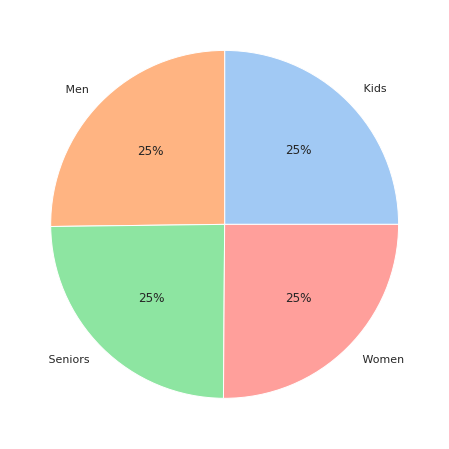

In [80]:
labels = group_pivot['mean']['Sales'].index.to_list()
# print(labels)
colors = sns.color_palette('pastel')[0:5]
plt.pie(group_pivot['mean']['Sales'], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

The group-wise distribution presents us an interesting picture. **Men**, **Women**, **Kids** and **Seniors** have equal share, in terms of the value of sales for the entire three-month period.

## Timewise Analysis
In the next, we are going to perform the analysis based on the next categorical data of the problem - **Time**.  Here, we are going to pivot our main dataframe ```df``` indexed on **Time**, and also we are providing the same two ```aggfunc```tions for computing - ```sum``` and ```mean```. The reporting will be state-wise, and we are calling it as ```time_pivot```. As you can see from the output, both ```sum``` and ```mean``` for **Unit** and **Sales** are reported.

In [81]:
time_pivot = pd.pivot_table(df, index='Time', aggfunc=['sum', 'mean'])
time_pivot

sum                 mean           
                Sales   Unit         Sales       Unit
Time                                                 
 Afternoon  114007500  45603  45241.071429  18.096429
 Evening    112087500  44835  44479.166667  17.791667
 Morning    114207500  45683  45320.436508  18.128175

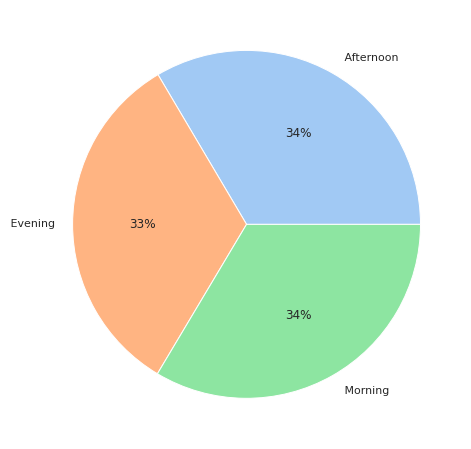

In [82]:
labels = time_pivot['mean']['Sales'].index.to_list()
# print(labels)
colors = sns.color_palette('pastel')[0:5]
plt.pie(time_pivot['mean']['Sales'], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

The time of sale doesn't matter for AAL, because, almost all the business are equi-distributed in terms of **Morning**, **Afternoon** or **Evening** Sales.

# Report
This report is based on the analysis of three month data - October, November and December 2020. One small detail is that the 31-Oct-2020 is missing in its entirity, and has been ignored. Based on the analysis of monthly data, the apparal business saw a subdued activity in the month of November, and both Unit and Sales saw a muted business. However, the month of December had a stellar performance of approximately 1.5 times the month of November.

In terms of the state-wise analysis, just 3 states contributed to the overall three-month sales - VIC, NSW and SA. The remaining states controbution was just around 30%. The topper-state was VIC, while the laggard state were WA, NT and TAS (with a contribution of just 7% each). 

One thing that is clear from the overall numbers is that the apparals were equally popular among different age groups - kids, men, women or seniors. 

No particular time was a bad time for AAL for business, as the business was equally busy during all the times of store business hours.